In [15]:
import skimage
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [46]:
def get_contrast(image_stack, line_skip = 5):
    """Obtains an estimate of the Michelson contrast

    Args:
        image_stack (np.array): focal scanning stack of 2D images, assuming to be the grating
            with shape (stack, long dim, short dim))
        line_skip (int): obtains an estimate for every line_skip lines

    Returns:
        contrast_avg, contrast_std: mean and std deviation of contrast estimates
    """
    N_images = len(image_stack)

    image_stack = image_stack.astype('float64')

    maxes = np.max(image_stack[:,:,0::line_skip], axis=1)
    mins = np.min(image_stack[:,:,0::line_skip], axis=1)

    # Michelson contrast
    contrast = (maxes - mins)/ (maxes + mins)
    contrast_avg = np.average(contrast, axis=1)
    contrast_std = np.std(contrast, axis=1)

    return contrast_avg, contrast_std

In [47]:
PATH_TO_IMAGE = '../OPT Shared files/2022-12-15 dof investigations/2022-12-15 grating in water depth sweep/MMStack_Pos0.ome.tif'

In [48]:
im = io.imread(PATH_TO_IMAGE)

In [49]:
len(get_contrast(im)[0])

40

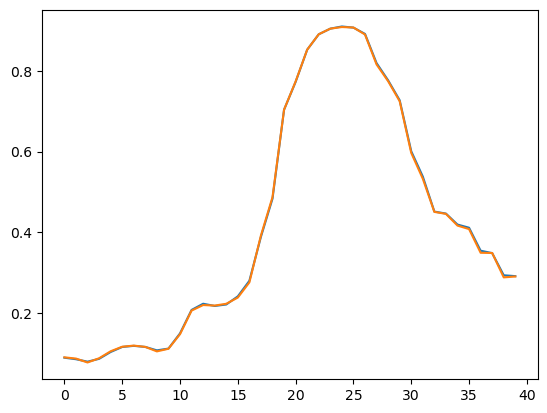

In [53]:
plt.errorbar(get_contrast(im)[0])
plt.plot(get_contrast(im, 102)[0])